In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
%matplotlib inline

In [17]:
df = pd.read_csv("smsspamcollection/SMSSpamCollection", sep = "\t", header = None)
df.columns = ["classes", "text"]
df.tail(1)

,classes,text
5571,ham,Rofl. Its true to its name


In [26]:
X = df.iloc[:, -1]
y = df.iloc[:, 0]

In [44]:
X_model, X_holdout, y_model, y_holdout = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size = 0.3, random_state = 42)

In [46]:
tfidf = TfidfVectorizer()

In [49]:
tr_X_train = tfidf.fit_transform(X_train)

In [50]:
tr_X_train_dense = pd.DataFrame(tr_X_train.todense(), columns = [tfidf.get_feature_names()])

In [51]:
tr_X_train_dense.tail(1)

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zac,zebra,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# modeling

In [53]:
logr = LogisticRegression()

In [54]:
logr.fit(tr_X_train_dense, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
tr_X_test = tfidf.transform(X_test)

In [56]:
tr_X_test_dense = pd.DataFrame(tr_X_test.todense(), columns = [tfidf.get_feature_names()])

In [57]:
logr.score(tr_X_test_dense, y_test)

0.96410256410256412

In [59]:
y_pred = logr.predict(tr_X_test_dense)

In [75]:
y_pred_proba = pd.DataFrame(logr.predict_proba(tr_X_test_dense)).iloc[:, 1]

In [60]:
confusion_matrix(y_test, y_pred)

array([[1018,    0],
       [  42,  110]])

In [65]:
len(y_pred[y_pred == "spam"])

110

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label = "spam")

In [80]:
auc(fpr, tpr)

0.99349214145383113

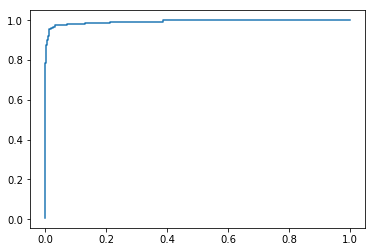

In [84]:
plt.plot(fpr, tpr)

In [85]:
# holdout

In [86]:
tr_X_holdout = tfidf.transform(X_holdout)

In [87]:
tr_X_holdout_dense = pd.DataFrame(tr_X_holdout.todense(), columns = [tfidf.get_feature_names()])

In [88]:
logr.score(tr_X_holdout_dense, y_holdout)

0.96590909090909094

In [89]:
y_holdout_pred = logr.predict(tr_X_holdout_dense)

In [91]:
y_holdout_pred_proba = pd.DataFrame(logr.predict_proba(tr_X_holdout_dense)).iloc[:, 1]

In [90]:
confusion_matrix(y_holdout, y_holdout_pred)

array([[1447,    1],
       [  56,  168]])

In [92]:
fpr, tpr, thresholds = roc_curve(y_holdout, y_holdout_pred_proba, pos_label = "spam")

In [93]:
auc(fpr, tpr)

0.98969637924230458